# Deep Learning | Model Optimization

### Dataset: MNIST Fashion| Framework: Keras (Tensorflow)

🎯 Objective: Move from a basic MLP to a well-tuned model and benchmark against classical ML methods.
- Baseline MLP typically scores ~58–60% accuracy.
- Deep regularized MLPs can achieve ~80–94% with tuning.
- Tree-based methods like Random Forest or XGBoost may reach ~97%.

## 📌 Step 1: Load and Preprocess the Data

In [2]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 3.7/376.0 MB 7.8 MB/s eta 0:00:48
    --------------------------------------- 6.0/376.0 MB 8.8 MB/s eta 0:00:43
    --------------------------------------- 9.2/376.0 MB 10.2 MB/s eta 0:00:37
   - -------------------------------------- 13.1/376.0 MB 11.4 MB/s eta 0:00:32
   - -------------------------------------- 15.7/376.0 MB 11.5 MB/s eta 0:00:32
   -- ------------------------------------- 18.9/376.0 MB 11.9 MB/s eta 0:00:30
   -- ------------------------------------- 22.0/376.0 MB 12.3 MB/s eta 0:00:29
   -- ------------------------------------- 24.9/376.0 MB 12.4 MB/s eta 0:00:29
   --- ------------------------------------ 28.3/376.0 MB 12.7 MB/s eta 0:00:28
   --- ------------------------------------ 31.5/376.0 MB 13.0 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [4]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load data
data = fetch_covtype()
X, y = data.data, data.target - 1  # make 0-indexed

In [7]:
X.shape

(581012, 54)

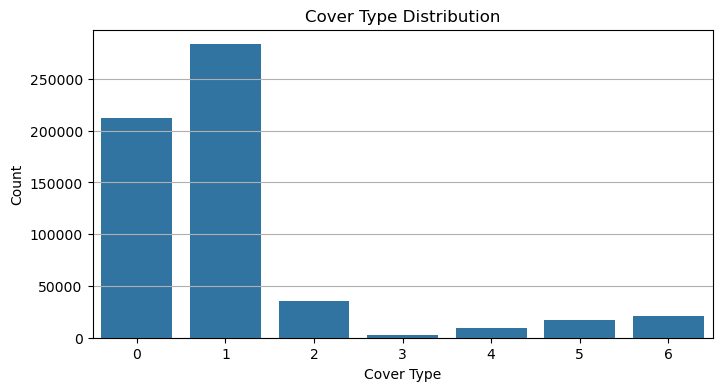

In [8]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [9]:
print("\n Summary Statistics for the first 10 features")
print(pd.DataFrame(X[:,:10]).describe())


 Summary Statistics for the first 10 features
                   0              1              2              3  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704     269.428217   
std       279.984734     111.913721       7.488242     212.549356   
min      1859.000000       0.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000     108.000000   
50%      2996.000000     127.000000      13.000000     218.000000   
75%      3163.000000     260.000000      18.000000     384.000000   
max      3858.000000     360.000000      66.000000    1397.000000   

                   4              5              6              7  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean       46.418855    2350.146611     212.146049     223.318716   
std        58.295232    1559.254870      26.769889      19.768697   
min      -173.000000       0.000000       0.000000     

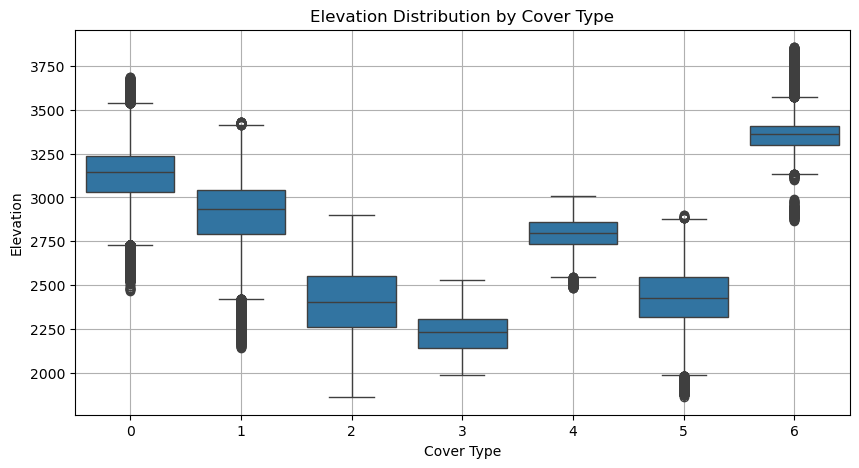

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=y, y=X[:, 0]) # Access Elevation data using column index 0
plt.title("Elevation Distribution by Cover Type")
plt.xlabel("Cover Type")
plt.ylabel("Elevation")
plt.grid(True)
plt.show()

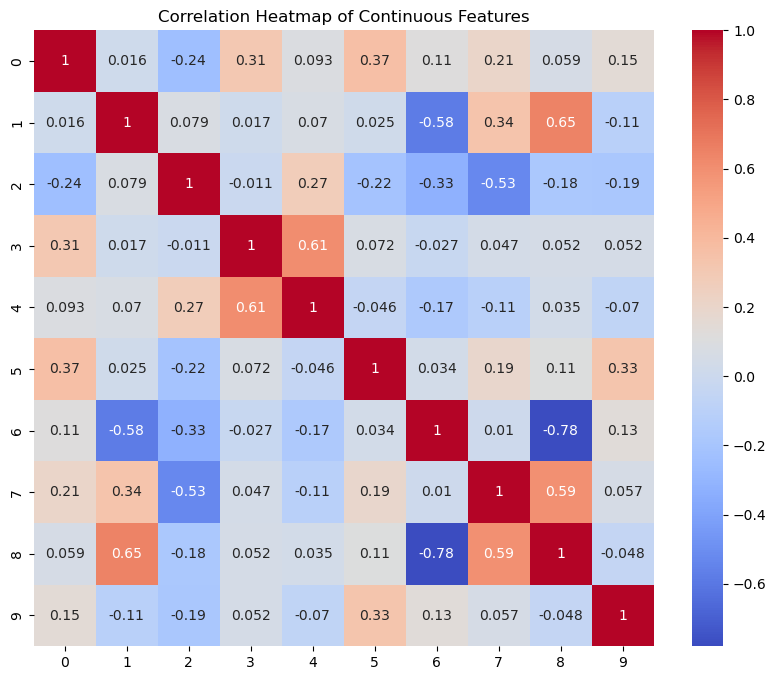

In [11]:
continuous_features = pd.DataFrame(X[:, :10])
plt.figure(figsize=(10,8))
sns.heatmap(continuous_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

In [12]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64


In [13]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
X_train.shape

(464809, 54)

In [15]:
# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

## 📌 Step 2: Define and Train a Baseline MLP Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

In [18]:
baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 128)           │        7,040 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 64)            │        8,256 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 32)            │        2,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 7)             │          231 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [20]:
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=10,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7375 - loss: 0.6156 - val_accuracy: 0.8075 - val_loss: 0.4667
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8141 - loss: 0.4462 - val_accuracy: 0.8252 - val_loss: 0.4196
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8319 - loss: 0.4069 - val_accuracy: 0.8385 - val_loss: 0.3907
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8416 - loss: 0.3841 - val_accuracy: 0.8462 - val_loss: 0.3794
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8501 - loss: 0.3655 - val_accuracy: 0.8537 - val_loss: 0.3674
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8548 - loss: 0.3558 - val_accuracy: 0.8555 - val_loss: 0.3523
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8595 - loss: 0.3438 - val_accuracy: 0.8570 - val_loss: 0.3512
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8639 - loss: 0.3368 - 

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

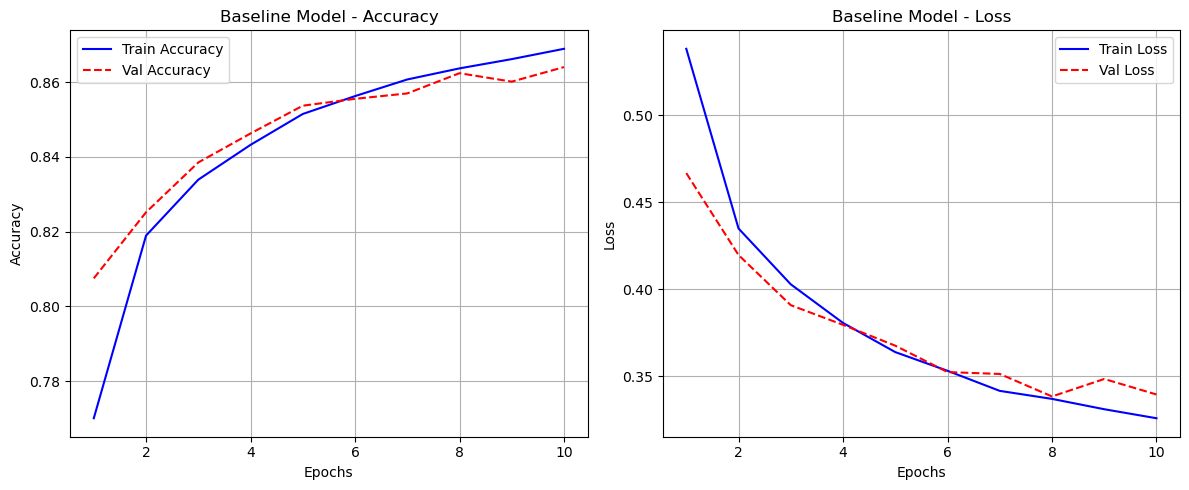

In [23]:
plot_learning_curves(history_baseline, title='Baseline Model')

In [24]:
loss1, acc1 = baseline_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8654 - loss: 0.3381
Test accuracy : 86.44%
Test loss     : 33.87%


In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [26]:
reg_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

reg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_4 (Dense)               │ (None, 128)           │        7,040 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 128)           │       16,512 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 7)             │          903 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 24,455 (95.53 KB)

 Trainable params: 24,455 (95.53 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
reg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [28]:
history_reg = reg_model.fit(X_train, y_train,
                            validation_split=0.2,
                            epochs=30,
                            batch_size=128,
                            verbose=1)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6984 - loss: 0.8544 - val_accuracy: 0.7686 - val_loss: 0.5932
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7601 - loss: 0.6089 - val_accuracy: 0.7713 - val_loss: 0.5728
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7738 - loss: 0.5786 - val_accuracy: 0.7969 - val_loss: 0.5367
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7841 - loss: 0.5588 - val_accuracy: 0.8040 - val_loss: 0.5195
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7886 - loss: 0.5507 - val_accuracy: 0.8096 - val_loss: 0.5101
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7937 - loss: 0.5420 - val_accuracy: 0.8141 - val_loss: 0.5056
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7964 - loss: 0.5364 - val_accuracy: 0.8132 - val_loss: 0.5019
Epoch 8/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7981 - loss: 0.5330 -

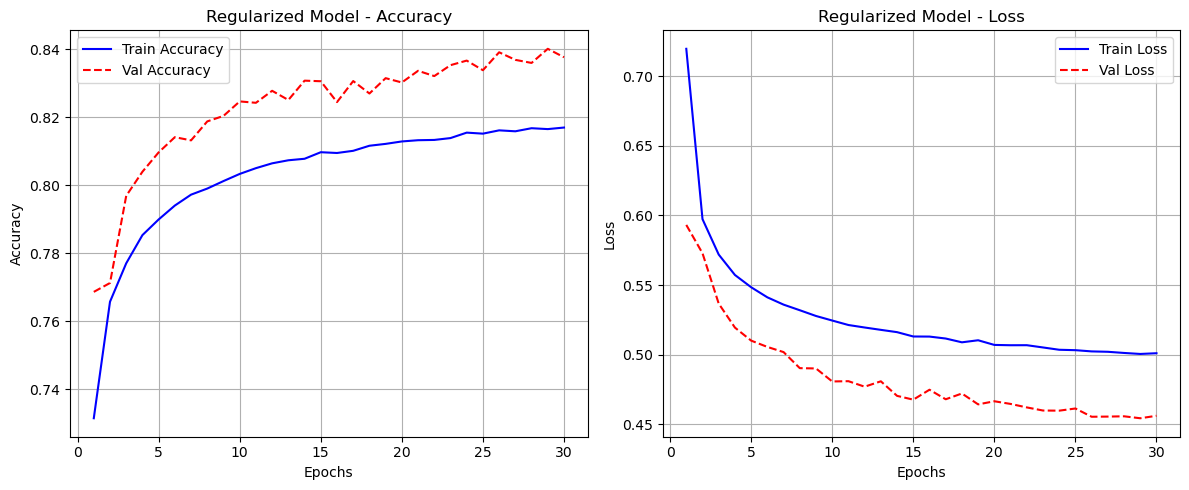

In [29]:
plot_learning_curves(history_reg, title='Regularized Model')

In [30]:
loss1, acc1 = reg_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8396 - loss: 0.4542
Test accuracy : 83.83%
Test loss     : 45.64%


Adding batch Normalization for stable tuning

In [31]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [32]:
bn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1024),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(7, activation='softmax')
])

bn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_7 (Dense)               │ (None, 1024)          │       56,320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 1024)          │        4,096 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation (Activation)       │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_2 (Dropout)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_8 (Dense)               │ (None, 512)           │      524,800 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 512)           │        2,048 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_1 (Activation)     │ (None, 512)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_3 (Dropout)           │ (None, 512)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_9 (Dense)               │ (None, 256)           │      131,328 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 256)           │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_2 (Activation)     │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_10 (Dense)              │ (None, 128)           │       32,896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_3         │ (None, 128)           │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_3 (Activation)     │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_11 (Dense)              │ (None, 64)            │        8,256 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_4         │ (None, 64)            │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_4 (Activation)     │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_12 (Dense)              │ (None, 7)             │          455 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 761,991 (2.91 MB)

 Trainable params: 758,023 (2.89 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [33]:
bn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
history_bn = bn_model.fit(X_train, y_train,
                          validation_split=0.2,
                          epochs=30,
                          batch_size=128,
                          verbose=1)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.6761 - loss: 0.7934 - val_accuracy: 0.7678 - val_loss: 0.5378
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7513 - loss: 0.5829 - val_accuracy: 0.7934 - val_loss: 0.4854
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7693 - loss: 0.5434 - val_accuracy: 0.8049 - val_loss: 0.4537
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.7807 - loss: 0.5166 - val_accuracy: 0.8199 - val_loss: 0.4261
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.7909 - loss: 0.4928 - val_accuracy: 0.8275 - val_loss: 0.4129
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.7984 - loss: 0.4774 - val_accuracy: 0.8354 - val_loss: 0.3910
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8046 - loss: 0.4623 - val_accuracy: 0.8424 - val_loss: 0.3787
Epoch 8/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8100 -

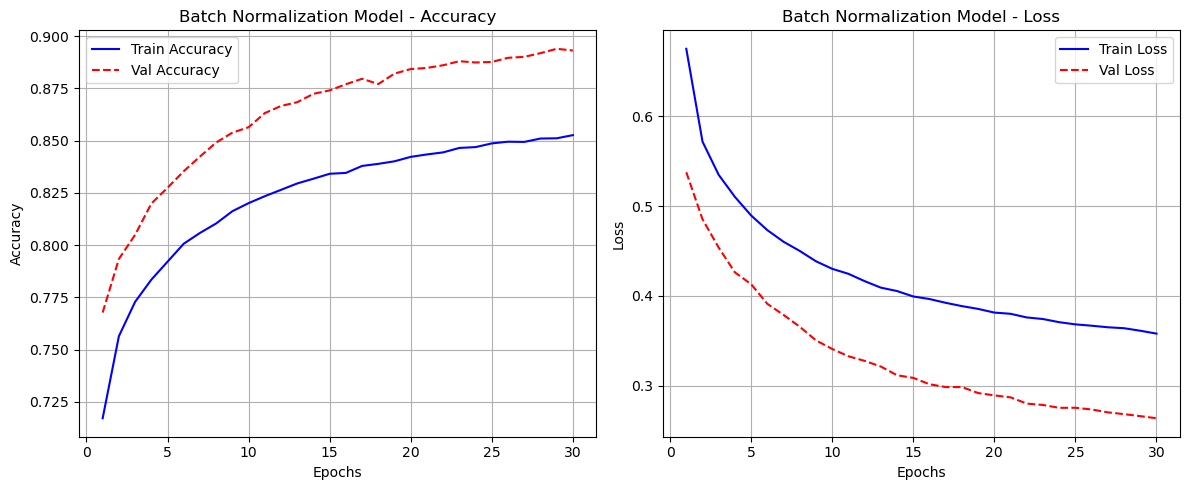

In [35]:
plot_learning_curves(history_bn, title='Batch Normalization Model')

In [36]:
loss1, acc1 = bn_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8940 - loss: 0.2622
Test accuracy : 89.30%
Test loss     : 26.32%


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [38]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

In [39]:
history_callbacks = bn_model.fit(X_train, y_train,
                                 validation_split=0.2,
                                 epochs=30,
                                 batch_size=128,
                                 verbose=1,
                                 callbacks=callbacks)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8540 - loss: 0.3566 - val_accuracy: 0.8933 - val_loss: 0.2627 - learning_rate: 0.0010
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8530 - loss: 0.3563 - val_accuracy: 0.8952 - val_loss: 0.2592 - learning_rate: 0.0010
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8556 - loss: 0.3529 - val_accuracy: 0.8962 - val_loss: 0.2555 - learning_rate: 0.0010
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8559 - loss: 0.3517 - val_accuracy: 0.8959 - val_loss: 0.2579 - learning_rate: 0.0010
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.8552 - loss: 0.3510 - val_accuracy: 0.8970 - val_loss: 0.2542 - learning_rate: 0.0010
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.8551 - loss: 0.3515 - val_accuracy: 0.8966 - val_loss: 0.2536 - learning_rate: 0.0010
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - accura

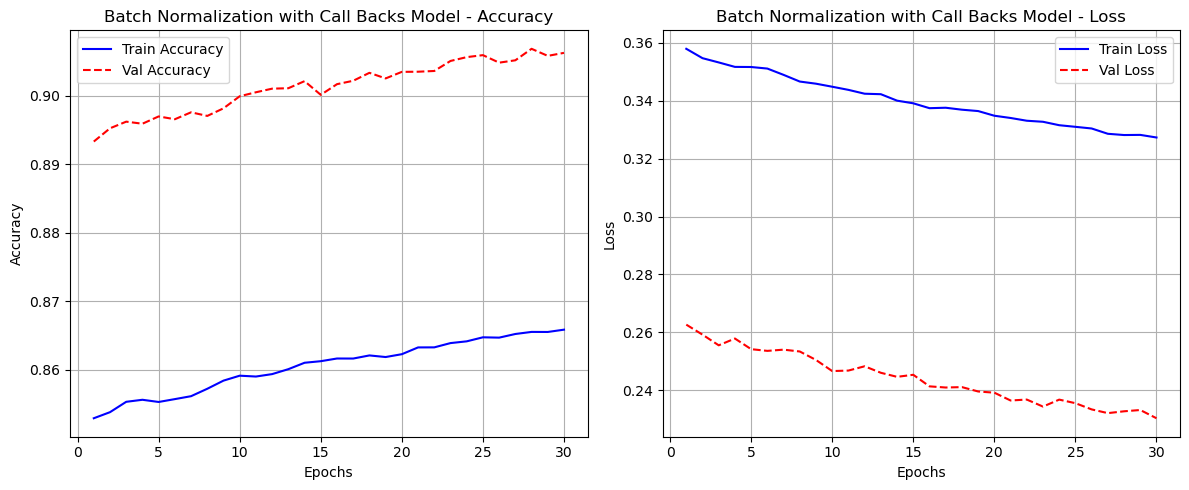

In [40]:
plot_learning_curves(history_callbacks, title='Batch Normalization with Call Backs Model')

In [41]:
loss1, acc1 = bn_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9065 - loss: 0.2287
Test accuracy : 90.60%
Test loss     : 22.96%


In [42]:
y_pred_bn_model = (bn_model.predict(X_test)).argmax(axis=1)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [43]:
from sklearn.metrics import accuracy_score
print("Batch Normalization with Call Backs Model Accuracy \n", accuracy_score(y_test, y_pred_bn_model))

Batch Normalization with Call Backs Model Accuracy 
 0.9060179169212499


In [44]:
# Print classification report
from sklearn.metrics import accuracy_score, classification_report
print(f"\n Batch Normalization with Call Backs Classification Report:")
print(classification_report(y_test, y_pred_bn_model))


 Batch Normalization with Call Backs Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     42368
           1       0.91      0.94      0.92     56661
           2       0.89      0.90      0.89      7151
           3       0.84      0.80      0.82       549
           4       0.75      0.71      0.73      1899
           5       0.79      0.83      0.81      3473
           6       0.90      0.93      0.91      4102

    accuracy                           0.91    116203
   macro avg       0.86      0.85      0.86    116203
weighted avg       0.91      0.91      0.91    116203



In [45]:
from sklearn.ensemble import RandomForestClassifier

ml_model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ml_model_random_forest.fit(X_train, y_train)
y_pred__random_forest = ml_model_random_forest.predict(X_test)

# Evaluate random forest model
accuracy = accuracy_score(y_test, y_pred__random_forest)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

# Print classification report
print(f"Random Forest Classification Report:")
print(classification_report(y_test, y_pred__random_forest))

Random Forest Test Accuracy: 0.9533
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [47]:
pip install xgboost lightgbm openpyxl

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.0 MB/s eta 0:00:30
   - -------------------------------------- 4.2/150.0 MB 10.9 MB/s eta 0:00:14
   - -------------------------------------- 7.1/150.0 MB 11.8 MB/s eta 0:00:13
   --- ------------------------------------ 12.1/150.0 MB 15.1 MB/s eta 0:00:10
   ---- ----------------------------------- 15.7/150.0 MB 15.7 MB/s eta 0:00:09
   ----- ---------------------------------- 21.2/150.0 MB 17.4 MB/s eta 0:00:08
   ------- -------------------------------- 28.8/150.0 MB 20.3 MB/s eta 0:00:06
   --------- ------------------------------ 35.9/150.0 MB 22.4 MB/s eta 0:00:06
   ----------- ---------------------------- 43.5/150.0 MB 24.1 MB/s eta 0:00:05
   ------------- -------------------------- 51.1/150.0 MB 25.2 MB/s eta 0:00:04
   ---------------- ----------------------- 60.3/150.0 MB 27.1

In [46]:
from xgboost import XGBClassifier

ml_model_xgboost = XGBClassifier(objective='multi:softmax', num_class=7, n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
ml_model_xgboost.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_pred_xgboost = ml_model_xgboost.predict(X_test)

# Evaluate random forest model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Random Forest Test Accuracy: {accuracy_xgboost:.4f}")

# Print classification report
print(f"Random Forest Classification Report:")
print(classification_report(y_test, y_pred_xgboost))